# Лабораторная работа 1

## Общая информация

**Дата выдачи**: 02.09.2022/05.09.2022

**Срок сдачи**: 16.09.2022/19.09.2022 *(Но требуется обязательная демонстрация текущего прогресса преподавателю во время лабораторного занятия 9.09.2022/12.09.2022)*

### О задании
Целью данного задания является формирование навыков работы с Jupyter Notebook-ами и библиотеками NumPy, Pandas, Matplotlib и sklearn. путём решения набора задач. Выполнение задание заключается в редактировании данного jupyter блокнота (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в задании функции (где они есть).

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить задание на указанных в ответном письме условиях.

Задание выполняется САМОСТОЯТЕЛЬНО. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

### Формат сдачи
** Устная защита выполненной лабораторной работы ОБЯЗАТЕЛЬНА! **

После успешной устной защиты переименуйте получившийся файл `*.ipynb` в соответствии со следующим форматом: *Username_lab_1.ipynb*, где Username — ваша фамилия на латинице (например, `lehusheu_lab_1.ipynb`) и отправьте этот файл электронной почтой по адресу `dmitri.legushev.bsu@gmail.com` c темой письма *Фамилия преподавателя - Лабораторная работа 1 - Фамилия Имя Отчество* (для обоих подгрупп). Подгруппа Атрохова Кирилла Георгиевича также ставит в копию адрес `?`. Это будет являться письменным отчетом о выполнении лабораторной работы.

## Numpy

***Во всех заданиях ниже запрещено использовать циклы.***

In [190]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from mpl_toolkits.mplot3d import axes3d 


**1.** Реализуйте функцию, принимающую на вход числа `N` и `k` и возвращающую `np.array` длины `N`, содержащий зацикленную последовательность от `1` до `k` (включительно). Например:
    
    print(cycle(10, 3))
    > array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1])

In [191]:
def cycle(N, k):
    if k < 1:
        raise Exception("k should be at least 1")
    return np.vectorize(lambda x: x%k + 1)(np.arange(N))

**2.** Реализуйте функцию, принимающую на вход `np.array` размера `N` и возвращающую матрицу размера `(N + 1) x (N + 1)`, у которой над главной даигональю стоят элементы массива (остальные элементы должны быть нулевыми). Например:
    
    print(next_diagonal(np.arange(1, 3)))
    > array([[0, 1, 0],
             [0, 0, 2],
             [0, 0, 0]])

In [192]:
def next_diagonal(X):
    return np.diag(X,1)

**3.** Реализуйте функцию, принимающую на вход матрицу `X` и два массива `i` и `j` одинаковой длины и возвращающую вектор np.array, состоящий из последовательности элементов `[X[i[0], j[0]], X[i[1], j[1]], ..., X[i[N-1], j[N-1]]]`.

In [193]:
def get_elements(X, i, j):
    return X[i,j]

**4.** Реализуйте функцию, принимающую на вход матрицу `X` и возвращающую минимальный нечетный элемент матрицы.

In [194]:
def min_odd(X):
    return np.min(X[X%2==1])

**5.** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например:

    X = np.arange(0,10)
    v = 3.6
    print(nearest_value(X, v))
    > 4

In [195]:
def nearest_value(X, v):
    return X[np.abs(X-v).argmin()]

## Pandas

Далее вам будет предложено ответить на вопросы по данным об авиарейсах в США за 2008 год. Обратите внимание, что функция pandas.read_csv умеет читать из архивов автоматически.

Описание датасета: http://stat-computing.org/dataexpo/2009/the-data.html

Загрузим данные файлов `2008_part.csv.bz2` и `airports.csv` из папки `data` в `pandas.DataFrame`-ы.

In [196]:
df = pd.read_csv('data/2008_part.csv.bz2')
airports = pd.read_csv('data/airports.csv', index_col='iata')

In [197]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6588715,2008,12,14,7,1623.0,1141,1946.0,1506,YV,...,6.0,25.0,0,NaN,0,280.0,0.0,0.0,0.0,0.0
1,6179044,2008,11,16,7,1225.0,1228,1804.0,1759,US,...,5.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,3343103,2008,6,15,7,2134.0,2120,2340.0,2316,F9,...,5.0,19.0,0,NaN,0,14.0,0.0,10.0,0.0,0.0
3,1422756,2008,3,30,7,2012.0,1912,2059.0,2003,UA,...,6.0,8.0,0,NaN,0,0.0,0.0,0.0,0.0,56.0
4,7001683,2008,12,7,7,1840.0,1845,2010.0,2014,DL,...,6.0,21.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [198]:
airports.head()

,airport,city,state,country,lat,long
iata,,,,,,
00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


**1.** Какая из причин отмены рейса (CancellationCode) была самой частой (расшифровки кодов можно найти в описании данных)? A на какое максимальное время задерживали полет по этой причине?

In [199]:
print(df.CancellationCode.value_counts())# B самая частая причина
df.loc[df['CancellationCode']=='B'].DepDelay.max()

B    5521
A    5449
C    2879
D       1
Name: CancellationCode, dtype: int64


712.0

**2.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [200]:
df.Distance.aggregate(['min',np.mean,'max']) # с помощью aggregate сразу несолько функций применил

min       24.000000
mean     726.850861
max     4962.000000
Name: Distance, dtype: float64

**3.** Найдите рейс (FlightNum) с максимальной длиной перелетов. Уникален ли такой рейс?

In [201]:
df.groupby('FlightNum').Distance.max().head(3) # сразу два рейса (1 и 2) имеют максимальную длину

FlightNum
1    4243
2    4243
3    4213
Name: Distance, dtype: int64

**4.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [202]:
print(df.Origin.value_counts().idxmax()) #idxmax берет индекс максимального 
airports.loc["ATL"].city # по индексу находим город

ATL


'Atlanta'

**5.** Найдите для каждого аэропорта среднее время полета (AirTime) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [203]:
print(df.groupby('Origin')['AirTime'].median().idxmax()) 
airports.loc['SJU'].city # также как в № 4

SJU


'San Juan'


**6.** Найдите самое популярное направление и сколько рейсов по нему совершено. Ответом является тройка `(Аэропорт отправления, аэропорт прибытия, количество рейсов)`

In [204]:
print(df.groupby(['Origin', 'Dest']).size().idxmax()) # сгруппировал сразу по двум колонкам, передав список в groupby
airports.loc[['SFO','LAX']].city 

('SFO', 'LAX')


iata
SFO    San Francisco
LAX      Los Angeles
Name: city, dtype: object

**7.** Найдите аэропорт, у которого наибольшая доля задержанных (DepDelay > 0) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (подсказка: используйте функцию `filter` после `groupby`).

In [205]:
tmp = df.groupby('Origin').filter(lambda x: x['ArrTime'].count()>1000) # сначала исключил все аэропорты,
# из которых было выпущено меньше 1000 рейсов

# поделил зажержанные рейсы на все рейсы и нашел индекс аэропорта в наибольшей долей
(tmp.loc[tmp['DepDelay']>0]['Origin'].value_counts()/tmp['Origin'].value_counts()).idxmax()

'DAL'

## Matplotlib

Загрузим данные по ирисам из файла `iris.data` из папки `data` в `pandas.DataFrame`-ы.

In [206]:
df_iris = pd.read_csv('data/iris.data', header=None)

In [207]:
df_iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**1.** Отрисовать первые две фичи на двумерном графике с указанием по цвету таргетов (целевых переменных).

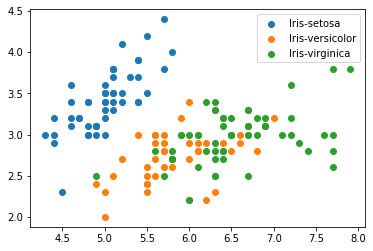

In [208]:
# сначала отобрал все классы ирисов (знаю что есть unique() и drop_duplicates(), просто первое что пришло в голову это set)
iris_types = list(set(df_iris.loc[:,4]))
grouped_data = list(df_iris.loc[:,[0,1,4]].groupby([4]))
# по отдельности подал в scatter каждый тип ирисов чтоб цвета рахные были
for i in range(len(grouped_data)):
    plt.scatter(*np.array(*grouped_data[i][1:]).T[:2],label=iris_types[i])
plt.legend()
plt.show()

**2.** Выделить две и три главные компоненты из предложенных фичей (аттрибутов)

In [209]:
# не обязательно, но желательно стандартизировать данные, в том же sklearn нашёл класс StandardScaler
data=df_iris.loc[:,[0,1,2,3]]
scaler = preprocessing.StandardScaler().fit(data)
standard_data = scaler.transform(data)
# проверка среднее = 0, отклонение = 1 
print(np.round(np.mean(standard_data, axis=0)))
print(np.std(standard_data, axis=0))

[-0. -0.  0. -0.]
[1. 1. 1. 1.]


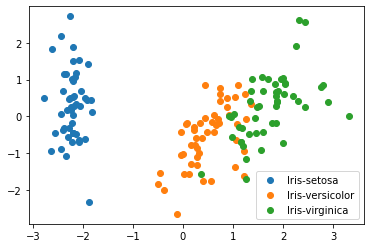

In [210]:
pca = PCA(n_components=2)
# тут как в документации
comp2_data = pd.DataFrame(pca.fit_transform(standard_data))

# надо сделать concat, чтобы также как и первом scatter вывести данные
comp2_df_iris = pd.concat([comp2_data, df_iris.loc[:,[4]]],axis=1)


grouped_data = list(comp2_df_iris.loc[:,[0,1,4]].groupby([4]))
for i in range(len(grouped_data)):
    plt.scatter(*np.array(*grouped_data[i][1:]).T[:2],label=iris_types[i])
plt.legend()
plt.show()

**3.** Отрисовать две главные компоненты на двумерной точечной диаграмме и три главные компоненты на трёхмерной точечной диаграмме с указанием по цвету таргетов (целевых переменных).

<IPython.core.display.Javascript object>


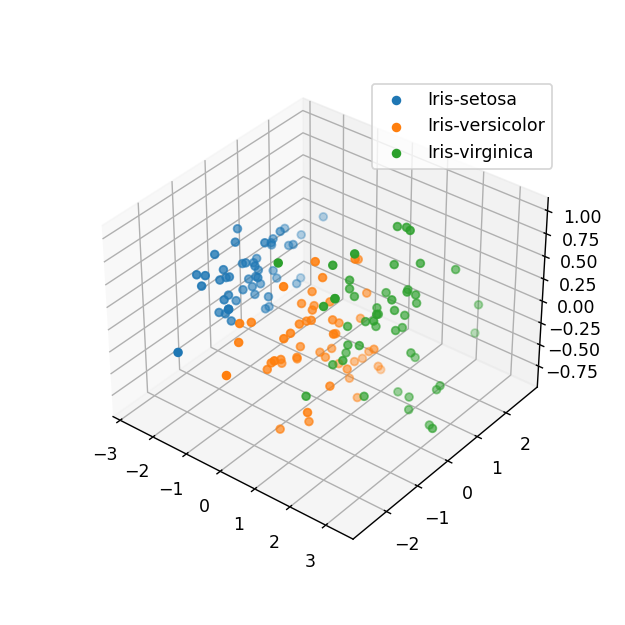

In [211]:
pca3 = PCA(n_components=3)
comp2_data3 = pd.DataFrame(pca3.fit_transform(standard_data))
comp2_df_iris3 = pd.concat([comp2_data3, df_iris.loc[:,[4]]],axis=1)

grouped_data = list(comp2_df_iris3.groupby([4]))
# эту штуку я доюавил чтоб можно было повертеть эти точки
%matplotlib notebook

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

for i in range(len(grouped_data)):
    ax.scatter(*np.array(*grouped_data[i][1:]).T[:3],label=iris_types[i])
plt.legend()
plt.show()